# KNN

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from termcolor import colored
from sklearn.tree import DecisionTreeClassifier, plot_tree
from scipy.io import arff
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import GridSearchCV


from sklearn.neighbors import KNeighborsClassifier 
import plotly.express as px
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.decomposition import PCA



Ucitavanje podataka

In [2]:

data = pd.read_csv('/home/user/Desktop/IP/sredjeni_podaci.csv')
print(data.shape)



(8378, 123)


In [3]:
print(data['Unnamed: 0'])
data.drop('Unnamed: 0',axis = 1,inplace = True)


0          0
1          1
2          2
3          3
4          4
        ... 
8373    8373
8374    8374
8375    8375
8376    8376
8377    8377
Name: Unnamed: 0, Length: 8378, dtype: int64



Razdvajamo ciljni atribut od ostalih atributa,pa podatke delimo na trening i test skup

In [4]:
Y = data['match']
X = data.drop('match',axis = 1)

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=112)

Pomocne fukcije za proveru kvaliteta modela.Kod je preuzet iz materijala sa vezbi:

In [6]:
 def report(model, x, y, text = "training"):
    y_pred = model.predict(x)
    
    print(colored("Izvestaj o klasifikaciji za model{} nad {} podacima".format(type(model).__name__, text), "green"))
    print("---------------------------------------------------------------------------------")
    print(classification_report(y, y_pred))
    print("---------------------------------------------------------------------------------")
    
    print(colored("Matrica konfuzije za model {} nad {} podacima ".format(type(model).__name__, text), "green"))
    print("---------------------------------------------------------------------------------")
    print(pd.DataFrame(confusion_matrix(y, y_pred), columns=['1', '0'], index=['1', '0']))
    print("---------------------------------------------------------------------------------")

Pre primene KNN algoritma moramo da normalizujemo podatke.


# Normalizacija originalnih podataka i primena algoritma knn

In [7]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)
report(knn,X_train,Y_train,text = "TRENING")
report(knn,X_test,Y_test,text = "TEST")


Izvestaj o klasifikaciji za modelKNeighborsClassifier nad TRENING podacima
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      4898
           1       0.79      0.47      0.59       966

    accuracy                           0.89      5864
   macro avg       0.85      0.72      0.76      5864
weighted avg       0.88      0.89      0.88      5864

---------------------------------------------------------------------------------
Matrica konfuzije za model KNeighborsClassifier nad TRENING podacima 
---------------------------------------------------------------------------------
      1    0
1  4780  118
0   516  450
---------------------------------------------------------------------------------
Izvestaj o klasifikaciji za modelKNeighborsClassifier nad TEST podacima
---------------------------------------------------------------------------------
       

# PCA

Nakon sto smo normalizovali podatke, mozemo primeniti algoritam PCA sa smanjenje dimenzionalnosti naseg skupa podatka. Zelimo da smanjimo broj atributa.

In [8]:
pca = PCA(2)

Glavne komponente su linearne kombinacije polaznih aritibuta, pca.components_
nam daje koefincijente polaznih atributa

In [9]:
pca.fit(X_train)

PCA(n_components=2)

In [10]:
pca.components_

array([[ 0.00386665,  0.06069593,  0.01596386, -0.00257095,  0.01714877,
         0.01591743, -0.0244669 , -0.02210896, -0.01491206, -0.01615924,
        -0.00102453, -0.0123406 , -0.00264108, -0.01238982, -0.03383728,
         0.02903796,  0.01910876, -0.01721921,  0.01206462,  0.02021108,
        -0.02833412,  0.02160224,  0.01022533, -0.02460988,  0.00530475,
         0.00584673, -0.09930971, -0.09026929, -0.08080192, -0.10900437,
        -0.07170097, -0.09702613, -0.09684816, -0.08936425, -0.07880733,
        -0.11175907, -0.07471284, -0.09805473,  0.02241817,  0.003899  ,
         0.01696328, -0.00581679, -0.06245796,  0.00643669,  0.03201526,
         0.00118466,  0.00404921, -0.01929365, -0.04352004,  0.00130017,
        -0.09666427, -0.07729378, -0.12911199, -0.06601659, -0.09409772,
        -0.10169896, -0.07833132, -0.12583839, -0.06881117, -0.09291416,
        -0.14578465, -0.1706842 , -0.18129777, -0.18613425, -0.16787328,
        -0.17995669, -0.14217193, -0.16520603, -0.1

Zelimo da vidimo koliko koji od polaznih atributa ima udeo u svakoj od 2 glavne komponnte

In [11]:
pca_names = [f'pca_{i}' for i in range(0,2)]
print(pca_names)

['pca_0', 'pca_1']


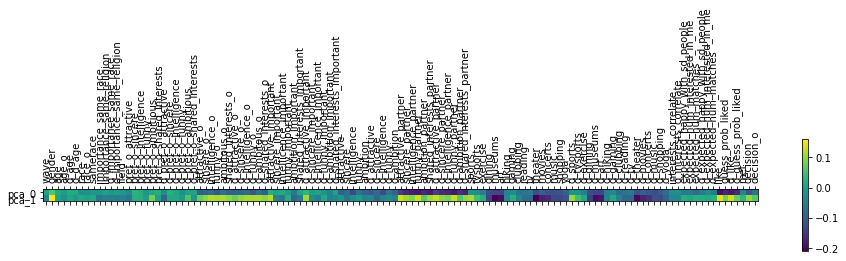

In [12]:
feature_names = X.columns
plt.matshow(pca.components_)
plt.xticks(ticks=range(pca.components_.shape[1]),
           labels=feature_names,rotation = 'vertical')
plt.yticks(ticks=range(pca.n_components_),
           labels=pca_names)
plt.colorbar()
plt.show()

Sada zelimo da vidimo udeo objasnjene varijanse svake od glavnih kompomenti

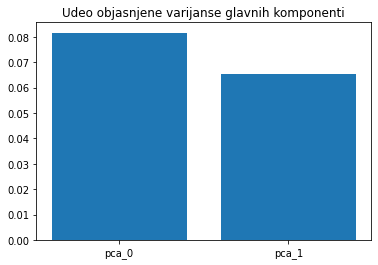

In [13]:

plt.bar(x=pca_names,
        height=pca.explained_variance_ratio_)
plt.title('Udeo objasnjene varijanse glavnih komponenti')
plt.show()


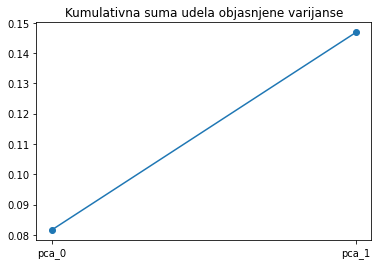

In [14]:

plt.plot(pca_names, np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title('Kumulativna suma udela objasnjene varijanse')
plt.show()

Objasnjeno je oko 15 % varianse podataka, 
pa mislim da sam izabrala mali broj glavnih kompomenti.
Probacemo da smanjimo broj komponenti, ali tako da udeo objanjene varijanse bude bar 90%.


In [15]:
pca2 = PCA(0.90)


In [16]:
pca2.fit(X_train)

PCA(n_components=0.9)

In [17]:
pca_names2 = [f'pca_{i}' for i in range(pca2.n_components_)]

In [18]:
print(pca_names2)

['pca_0', 'pca_1', 'pca_2', 'pca_3', 'pca_4', 'pca_5', 'pca_6', 'pca_7', 'pca_8', 'pca_9', 'pca_10', 'pca_11', 'pca_12', 'pca_13', 'pca_14', 'pca_15', 'pca_16', 'pca_17', 'pca_18', 'pca_19', 'pca_20', 'pca_21', 'pca_22', 'pca_23', 'pca_24', 'pca_25', 'pca_26', 'pca_27', 'pca_28', 'pca_29', 'pca_30', 'pca_31', 'pca_32', 'pca_33', 'pca_34', 'pca_35', 'pca_36', 'pca_37', 'pca_38', 'pca_39', 'pca_40', 'pca_41', 'pca_42', 'pca_43', 'pca_44', 'pca_45', 'pca_46', 'pca_47', 'pca_48', 'pca_49', 'pca_50', 'pca_51', 'pca_52', 'pca_53', 'pca_54', 'pca_55']



Broj glavnih komponti se povecao na 56.
Ponovo zelimo da vidimo koliko koji polazni atribut ucestvuje u "izgradnji" novih atributa

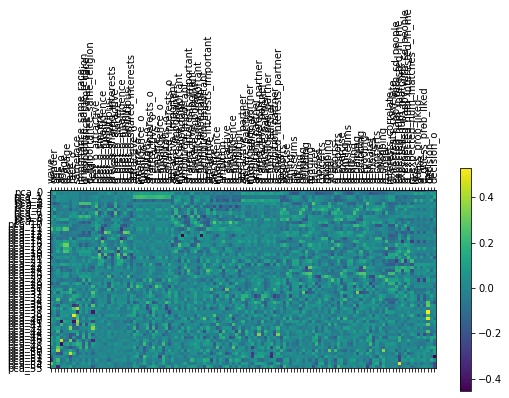

In [19]:
plt.matshow(pca2.components_)
plt.xticks(ticks=range(pca2.components_.shape[1]),
           labels=feature_names,rotation = 'vertical')
plt.yticks(ticks=range(pca2.n_components_),
           labels=pca_names2)
plt.colorbar()
plt.show()


Posmatrama kumulativnu sumu udela ubjasnjene varijanse

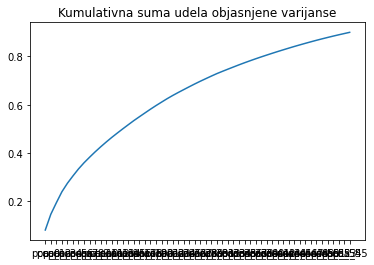

In [20]:
plt.plot(pca_names2, np.cumsum(pca2.explained_variance_ratio_))
plt.title('Kumulativna suma udela objasnjene varijanse')
plt.show()

Transformacija podataka

In [21]:
Y = data['match']
X = data.drop('match',axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=112)


X_train_pca = pca2.transform(X_train)
X_test_pca = pca2.transform(X_test)



/home/user/.local/lib/python3.8/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(
/home/user/.local/lib/python3.8/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


# KNN 

In [22]:

knn = KNeighborsClassifier()
knn.fit(X_train_pca,Y_train)
report(knn,X_train_pca,Y_train,text = "TRENING")
report(knn,X_test_pca,Y_test,text = "TEST")



Izvestaj o klasifikaciji za modelKNeighborsClassifier nad TRENING podacima
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.98      0.93      4898
           1       0.72      0.32      0.44       966

    accuracy                           0.87      5864
   macro avg       0.80      0.65      0.68      5864
weighted avg       0.85      0.87      0.85      5864

---------------------------------------------------------------------------------
Matrica konfuzije za model KNeighborsClassifier nad TRENING podacima 
---------------------------------------------------------------------------------
      1    0
1  4780  118
0   657  309
---------------------------------------------------------------------------------
Izvestaj o klasifikaciji za modelKNeighborsClassifier nad TEST podacima
---------------------------------------------------------------------------------
       

# Poredjenje modela ROC krivom

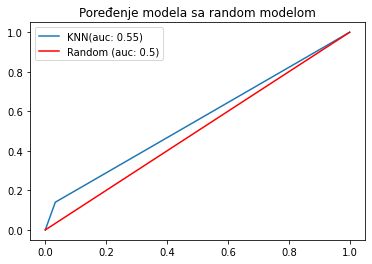

In [24]:
models = [knn]
model_names = ['KNN']
for model, model_name in zip(models, model_names):
    y_pred = model.predict(X_test_pca)
    fpr,tpr, _ = roc_curve(Y_test, y_pred)
    auc = roc_auc_score(Y_test, y_pred)
    lab = model_name + "(auc: " + str(round(auc, 2)) + ")"
    plt.plot(fpr, tpr, label=lab)

plt.plot([0, 1], [0, 1], label='Random (auc: 0.5)', color='red')
plt.title("Poređenje modela sa random modelom")
plt.legend()
plt.show()
